In [1]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess
from sklearn.metrics import recall_score


# ======================= CONFIGURACIÓN =======================
batch_size = 32
modelos_dir = 'modelos'
base_dir = './Banana Ripeness Classification Dataset V2'  
output_csv = 'resultados_test.csv'

# ======================= FUNCIONES =======================
def get_preprocessor_and_size(architecture):
    if 'RESNET' in architecture.upper():
        return resnet_preprocess, (224, 224)
    elif 'VGG' in architecture.upper():
        return vgg_preprocess, (224, 224)
    elif 'XCEPTION' in architecture.upper():
        return xception_preprocess, (299, 299)
    else:
        raise ValueError(f"Arquitectura desconocida: {architecture}")

def create_test_generator(preprocess_func, image_size):
    datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    return datagen.flow_from_directory(
        os.path.join(base_dir, 'test'),
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

def evaluate_model(model, generator):
    y_true = generator.classes
    y_pred_probs = model.predict(generator, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')


    return accuracy, f1, mcc, precision, recall

# ======================= EVALUACIÓN =======================
resultados = []

for arquitectura in os.listdir(modelos_dir):
    arch_path = os.path.join(modelos_dir, arquitectura)
    if not os.path.isdir(arch_path):
        continue

    print(f"\n🔎 Procesando arquitectura: {arquitectura}")
    
    try:
        preprocess_func, image_size = get_preprocessor_and_size(arquitectura)
        test_generator = create_test_generator(preprocess_func, image_size)
    except Exception as e:
        print(f"❌ Error configurando generator para {arquitectura}: {e}")
        continue

    for modelo_file in os.listdir(arch_path):
        if not modelo_file.endswith('.h5'):
            continue

        model_path = os.path.join(arch_path, modelo_file)
        experiment_name = os.path.splitext(modelo_file)[0]
        print(f"▶️ Evaluando modelo: {experiment_name}")

        try:
            model = load_model(model_path, compile=False)
            acc, f1, mcc, prec, reca = evaluate_model(model, test_generator)

            resultados.append({
                'experiment': experiment_name,
                'architecture': arquitectura,
                'image_size': f"{image_size[0]}x{image_size[1]}",
                'accuracy': acc,
                'f1_score': f1,
                'mcc': mcc,
                'precision': prec,
                'recall': reca
            })

        except Exception as e:
            print(f"Error evaluando {experiment_name}: {e}")

# ======================= GUARDAR RESULTADOS =======================
df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv(output_csv, index=False)
print(f"\n✅ Resultados guardados en: {output_csv}")


2025-06-24 02:21:50.259971: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-24 02:21:50.260077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-24 02:21:50.353289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-24 02:21:50.533027: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-24 02:21:52.049280: W tensorflow/compiler/tf2


🔎 Procesando arquitectura: RESNET50
Found 2015 images belonging to 4 classes.
▶️ Evaluando modelo: RESNET50_001_10


2025-06-24 02:21:55.022688: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-24 02:21:55.342615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-24 02:21:55.342807: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

▶️ Evaluando modelo: RESNET50_001_8
▶️ Evaluando modelo: RESNET50_00005_10
▶️ Evaluando modelo: RESNET50_00005_12
▶️ Evaluando modelo: RESNET50_00005_8
▶️ Evaluando modelo: RESNET50_0001_12
▶️ Evaluando modelo: RESNET50_0001_8
▶️ Evaluando modelo: RESNET50_001_12
▶️ Evaluando modelo: RESNET50_0001_10

🔎 Procesando arquitectura: XCEPTION
Found 2015 images belonging to 4 classes.
▶️ Evaluando modelo: XCEPTION_001_8
▶️ Evaluando modelo: XCEPTION_00005_8
▶️ Evaluando modelo: XCEPTION_0001_8
▶️ Evaluando modelo: XCEPTION_001_12
▶️ Evaluando modelo: XCEPTION_0001_10
▶️ Evaluando modelo: XCEPTION_00005_12
▶️ Evaluando modelo: XCEPTION_0001_12
▶️ Evaluando modelo: XCEPTION_00005_10
▶️ Evaluando modelo: XCEPTION_001_10

🔎 Procesando arquitectura: .ipynb_checkpoints
❌ Error configurando generator para .ipynb_checkpoints: Arquitectura desconocida: .ipynb_checkpoints

🔎 Procesando arquitectura: VGG16
Found 2015 images belonging to 4 classes.
▶️ Evaluando modelo: VGG16_00005_10
▶️ Evaluando modelo:

In [3]:
import pandas as pd

# Cargar el CSV con los resultados
df = pd.read_csv('resultados_test.csv')

# Crear una nueva columna con la suma total de métricas
df['total_score'] = df[['accuracy', 'f1_score', 'mcc', 'precision','recall']].sum(axis=1)

# Encontrar el mejor modelo por arquitectura
mejores_modelos = df.loc[df.groupby('architecture')['total_score'].idxmax()]

# Mostrar los mejores modelos
print("✅ Mejores modelos por arquitectura:")
print(mejores_modelos[['architecture', 'experiment', 'accuracy', 'f1_score', 'mcc', 'precision','recall' ,'total_score']])

✅ Mejores modelos por arquitectura:
   architecture       experiment  accuracy  f1_score       mcc  precision  \
1      RESNET50   RESNET50_001_8  0.978164  0.978262  0.971088   0.979038   
22        VGG16     VGG16_001_12  0.985112  0.985122  0.980132   0.985148   
17     XCEPTION  XCEPTION_001_10  0.976675  0.976657  0.968899   0.976736   

      recall  total_score  
1   0.978164     4.884716  
22  0.985112     4.920625  
17  0.976675     4.875642  


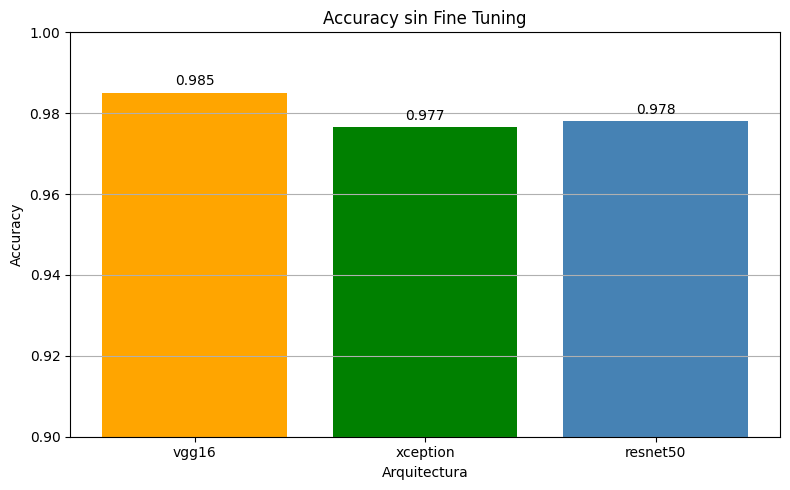

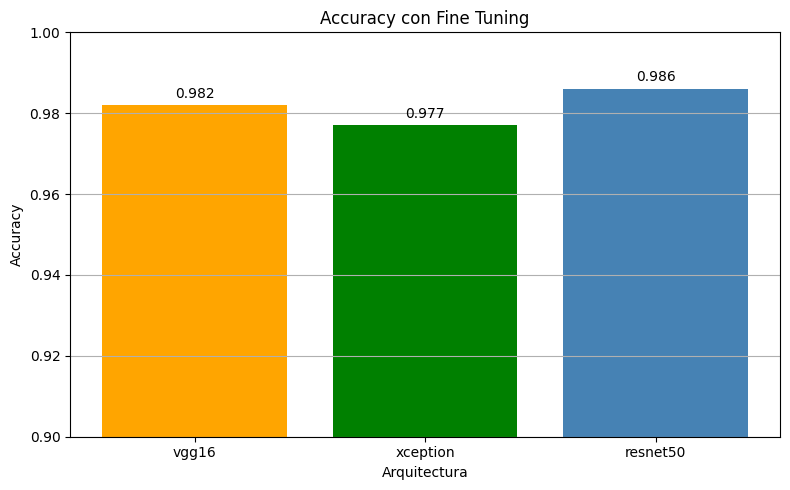

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === Cargar los archivos CSV ===
df_sin_ft = pd.read_csv("resultados_test.csv")
df_con_ft = pd.read_csv("accuracy_fine_tuning.csv")

# === Filtrar datos sin fine tuning ===
experimentos_sin_ft = ["RESNET50_001_8", "VGG16_001_12", "XCEPTION_001_10"]
df_sin_ft = df_sin_ft[df_sin_ft["experiment"].isin(experimentos_sin_ft)].copy()
df_sin_ft["architecture"] = df_sin_ft["experiment"].str.extract(r'(RESNET50|VGG16|XCEPTION)', expand=False).str.lower()

# === Filtrar datos con fine tuning ===
experimentos_con_ft = ["resnet50_FT", "vgg16_FT", "xception_FT"]
df_con_ft = df_con_ft[df_con_ft["experiment"].isin(experimentos_con_ft)].copy()
df_con_ft["architecture"] = df_con_ft["experiment"].str.extract(r'(resnet50|vgg16|xception)', expand=False)

# === Definir colores y orden fijo de arquitecturas ===
colores = {"resnet50": "steelblue", "vgg16": "orange", "xception": "green"}
orden = ["vgg16", "xception", "resnet50"]

# === Reordenar los DataFrames ===
df_sin_ft = df_sin_ft.set_index("architecture").reindex(orden).reset_index()
df_con_ft = df_con_ft.set_index("architecture").reindex(orden).reset_index()

# === Función auxiliar para agregar etiquetas encima de las barras ===
def agregar_etiquetas(ax, valores):
    for i, valor in enumerate(valores):
        ax.text(i, valor + 0.001, f"{valor:.3f}", ha='center', va='bottom', fontsize=10)

# === Gráfico sin Fine Tuning ===
plt.figure(figsize=(8, 5))
ax1 = plt.gca()
bars1 = ax1.bar(
    df_sin_ft["architecture"],
    df_sin_ft["accuracy"],
    color=[colores[arch] for arch in df_sin_ft["architecture"]]
)
agregar_etiquetas(ax1, df_sin_ft["accuracy"])
plt.title("Accuracy sin Fine Tuning")
plt.xlabel("Arquitectura")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.00)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# === Gráfico con Fine Tuning ===
plt.figure(figsize=(8, 5))
ax2 = plt.gca()
bars2 = ax2.bar(
    df_con_ft["architecture"],
    df_con_ft["test_accuracy"],
    color=[colores[arch] for arch in df_con_ft["architecture"]]
)
agregar_etiquetas(ax2, df_con_ft["test_accuracy"])
plt.title("Accuracy con Fine Tuning")
plt.xlabel("Arquitectura")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.00)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


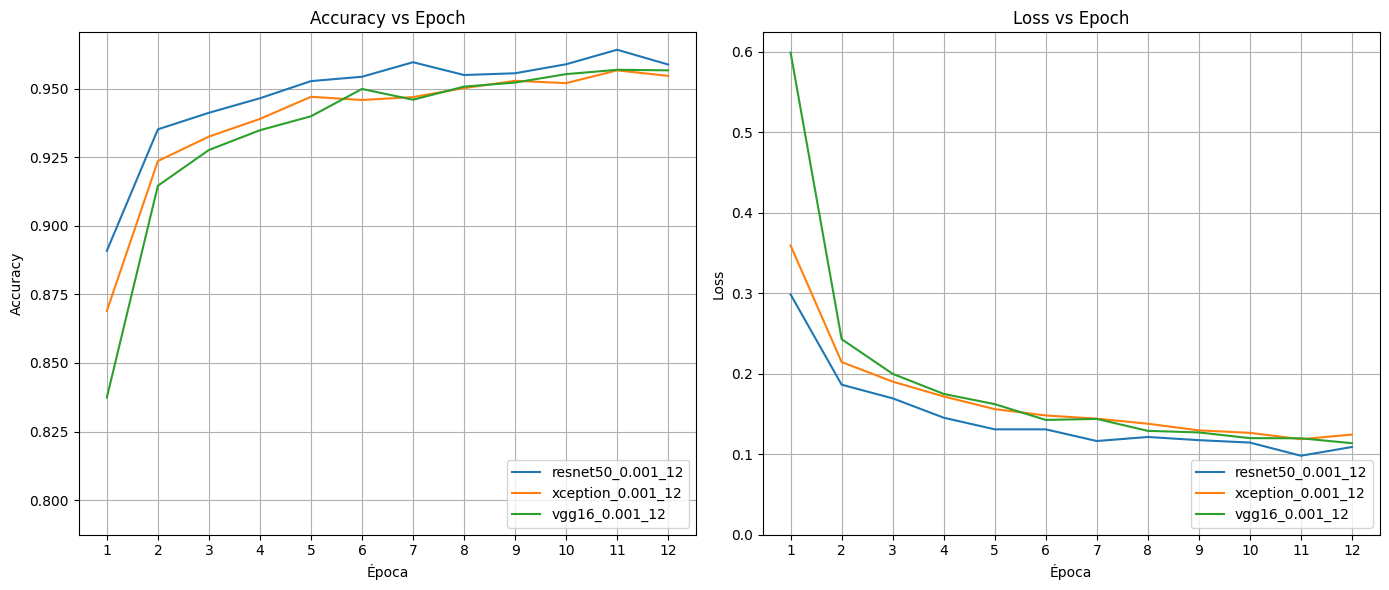

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
df = pd.read_csv("resultados_modelos.csv")

# Filtrar los experimentos que te interesan
experimentos = ["resnet50_0.001_12", "xception_0.001_12", "vgg16_0.001_12"]
df_filtrado = df[df["experiment"].isin(experimentos)]

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 6))

# ---------- GRÁFICO DE ACCURACY ----------
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
for nombre in experimentos:
    datos = df_filtrado[df_filtrado["experiment"] == nombre]
    plt.plot(datos["epoch"], datos["accuracy"], label=nombre)

plt.title("Accuracy vs Epoch")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.xticks(df_filtrado["epoch"].unique())  # Mostrar todas las épocas
plt.ylim(bottom=max(0, df_filtrado["accuracy"].min() - 0.05))  # Ajuste del eje Y
plt.legend(loc="lower right")
plt.grid(True)

# ---------- GRÁFICO DE LOSS ----------
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
for nombre in experimentos:
    datos = df_filtrado[df_filtrado["experiment"] == nombre]
    plt.plot(datos["epoch"], datos["loss"], label=nombre)

plt.title("Loss vs Epoch")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.xticks(df_filtrado["epoch"].unique())
plt.ylim(bottom=max(0, df_filtrado["loss"].min() - 0.1))  # Ajuste del eje Y
plt.legend(loc="lower right")
plt.grid(True)


# Mostrar el gráfico
plt.tight_layout()
plt.show()


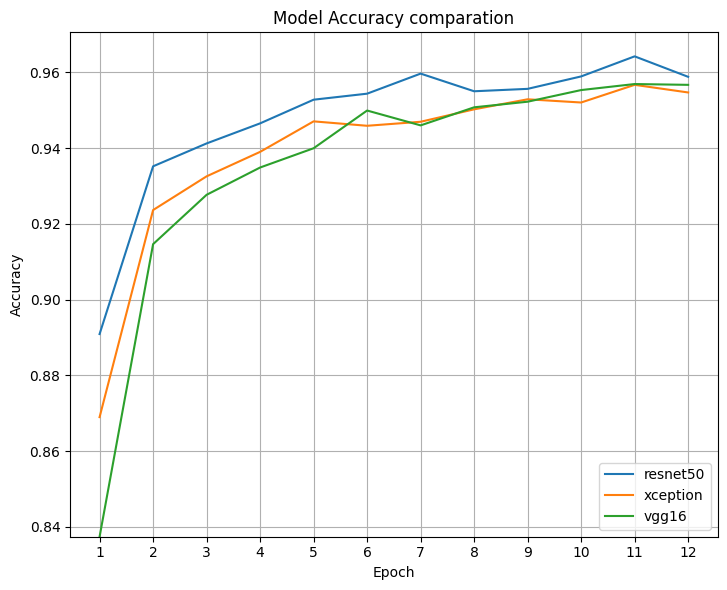

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv("resultados_modelos.csv")

# Filtrar los experimentos que te interesan
experimentos = ["resnet50_0.001_12", "xception_0.001_12", "vgg16_0.001_12"]
df_filtrado = df[df["experiment"].isin(experimentos)]

# Obtener mínimos exactos para ajustar ejes Y
min_accuracy = df_filtrado["accuracy"].min()
min_loss = df_filtrado["loss"].min()

# Crear figura
plt.figure(figsize=(14, 6))

# ---------- Accuracy ----------
plt.subplot(1, 2, 1)
for nombre in experimentos:
    datos = df_filtrado[df_filtrado["experiment"] == nombre]
    arquitectura = nombre.split("_")[0]
    plt.plot(datos["epoch"], datos["accuracy"], label=arquitectura)

plt.title("Model Accuracy comparation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(df_filtrado["epoch"].unique())
plt.ylim(bottom=min_accuracy)  # Limitar al valor mínimo real
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()

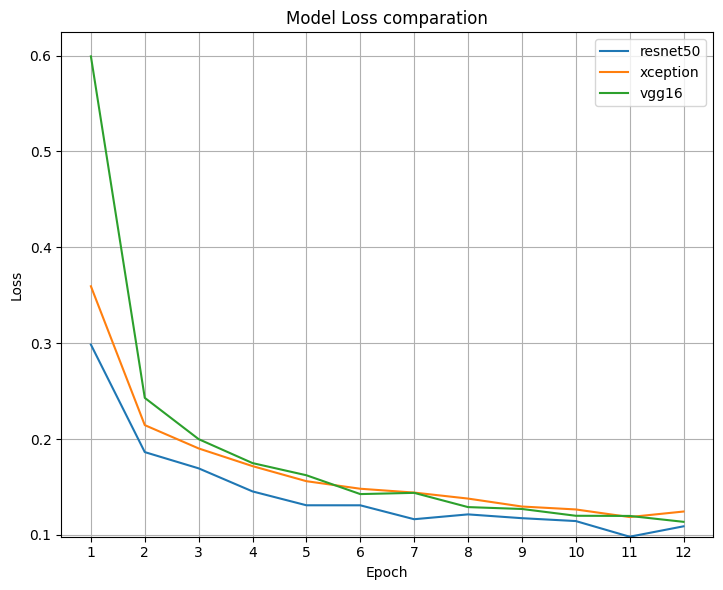

In [7]:
# ---------- Loss ----------
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for nombre in experimentos:
    datos = df_filtrado[df_filtrado["experiment"] == nombre]
    arquitectura = nombre.split("_")[0]
    plt.plot(datos["epoch"], datos["loss"], label=arquitectura)

plt.title("Model Loss comparation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(df_filtrado["epoch"].unique())
plt.ylim(bottom=min_loss)  # Limitar al valor mínimo real
plt.legend(loc="upper right")
plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("resultados_modelos.csv")

# Sumar el tiempo total por experimento
tiempo_total = df.groupby("experiment")["epoch_time"].sum().reset_index()

# Redondear el tiempo a 2 decimales
tiempo_total["epoch_time"] = tiempo_total["epoch_time"].round(2)

# Renombrar columna para claridad
tiempo_total.rename(columns={"epoch_time": "total_time_seconds"}, inplace=True)

# Mostrar resultados ordenados alfabéticamente por nombre de experimento
print(tiempo_total.sort_values(by="experiment"))



            experiment  total_time_seconds
0   resnet50_0.0001_10              909.07
1   resnet50_0.0001_12             1077.71
2    resnet50_0.0001_8              721.37
3    resnet50_0.001_10              896.96
4    resnet50_0.001_12              977.66
5     resnet50_0.001_8              606.68
6    resnet50_5e-05_10              933.18
7    resnet50_5e-05_12             1084.33
8     resnet50_5e-05_8              736.31
9      vgg16_0.0001_10              761.15
10     vgg16_0.0001_12              917.23
11      vgg16_0.0001_8              607.48
12      vgg16_0.001_10              768.05
13      vgg16_0.001_12              982.23
14       vgg16_0.001_8              605.20
15      vgg16_5e-05_10              836.86
16      vgg16_5e-05_12              902.90
17       vgg16_5e-05_8              609.12
18  xception_0.0001_10             1412.61
19  xception_0.0001_12             1702.28
20   xception_0.0001_8             1120.99
21   xception_0.001_10             1405.81
22   xcepti

In [10]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("resultados_modelos.csv")

# Para cada experimento, obtener la fila con la última época
ultimas_epocas = df.sort_values("epoch").groupby("experiment").tail(1)

# Extraer solo las columnas necesarias
resultados_val_accuracy = ultimas_epocas[["experiment", "val_accuracy"]].reset_index(drop=True)

# Redondear para presentación
resultados_val_accuracy["val_accuracy"] = resultados_val_accuracy["val_accuracy"].round(4)

# Mostrar resultados
print(resultados_val_accuracy.sort_values(by="experiment"))


            experiment  val_accuracy
9   resnet50_0.0001_10        0.9743
24  resnet50_0.0001_12        0.9728
0    resnet50_0.0001_8        0.9738
13   resnet50_0.001_10        0.9644
23   resnet50_0.001_12        0.9773
1     resnet50_0.001_8        0.9773
17   resnet50_5e-05_10        0.9654
26   resnet50_5e-05_12        0.9600
6     resnet50_5e-05_8        0.9619
16     vgg16_0.0001_10        0.9708
18     vgg16_0.0001_12        0.9718
8       vgg16_0.0001_8        0.9550
10      vgg16_0.001_10        0.9792
22      vgg16_0.001_12        0.9783
7        vgg16_0.001_8        0.9778
12      vgg16_5e-05_10        0.9555
20      vgg16_5e-05_12        0.9644
2        vgg16_5e-05_8        0.9397
15  xception_0.0001_10        0.9664
21  xception_0.0001_12        0.9718
3    xception_0.0001_8        0.9669
11   xception_0.001_10        0.9783
25   xception_0.001_12        0.9783
5     xception_0.001_8        0.9778
14   xception_5e-05_10        0.9516
19   xception_5e-05_12        0.9605
4

In [11]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("test_accuracy_log.csv")

df


,experiment,test_accuracy
0,vgg16_5e-05_10,0.951861
1,vgg16_5e-05_12,0.957320
2,vgg16_5e-05_8,0.932506
3,vgg16_0.0001_10,0.973201
4,vgg16_0.0001_12,0.967742
5,vgg16_0.0001_8,0.949380
6,vgg16_0.001_10,0.975682
7,vgg16_0.001_12,0.985112
8,vgg16_0.001_8,0.982630
9,resnet50_5e-05_10,0.970223


In [5]:
# ======================= EVALUACIÓN =======================
resultados = []

ft_dir = os.path.join(modelos_dir, 'FT')
for modelo_file in os.listdir(ft_dir):
    if not modelo_file.endswith('.h5'):
        continue

    model_path = os.path.join(ft_dir, modelo_file)
    experiment_name = os.path.splitext(modelo_file)[0]

    # Extraer arquitectura desde el nombre del archivo
    if 'RESNET' in experiment_name.upper():
        arquitectura = 'RESNET'
    elif 'VGG' in experiment_name.upper():
        arquitectura = 'VGG'
    elif 'XCEPTION' in experiment_name.upper():
        arquitectura = 'XCEPTION'
    else:
        print(f"❌ Arquitectura desconocida en nombre del modelo: {experiment_name}")
        continue

    print(f"\n▶️ Evaluando modelo: {experiment_name}")

    try:
        preprocess_func, image_size = get_preprocessor_and_size(arquitectura)
        test_generator = create_test_generator(preprocess_func, image_size)

        model = load_model(model_path, compile=False)
        acc, f1, mcc, prec, reca = evaluate_model(model, test_generator)

        resultados.append({
            'experiment': experiment_name,
            'architecture': arquitectura,
            'image_size': f"{image_size[0]}x{image_size[1]}",
            'accuracy': acc,
            'f1_score': f1,
            'mcc': mcc,
            'precision': prec,
            'recall': reca
        })

    except Exception as e:
        print(f"❌ Error evaluando {experiment_name}: {e}")



▶️ Evaluando modelo: VGG16_FT
Found 2015 images belonging to 4 classes.


2025-06-26 00:58:45.385426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-26 00:58:45.437593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-26 00:58:45.437810: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-


▶️ Evaluando modelo: RESNET50_FT
Found 2015 images belonging to 4 classes.

▶️ Evaluando modelo: XCEPTION_FT
Found 2015 images belonging to 4 classes.


In [7]:
df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv(output_csv, index=False)